## Problem Statement
The Given dataset contains the prices and other attributes of diamond. There are 10 attributes included in the dataset including the target ie. Price Perform Regression Analysis to predict the price of diamond.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Suppress Warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv("C:/Users/user/Desktop/diamonds.csv")

In [5]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [8]:
df.size

593340

In [9]:
df.shape

(53940, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## Feature description:
Price price in US dollars ( 326−− 18,823)This is the target column containing tags for the features.

### The 4 Cs of Diamonds:-
Carat (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats. One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs.

Cut (Fair, Good, Very Good, Premium, Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.

Color, from J (worst) to D (best) The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.

Clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.

Dimensions

X: Length in mm(0-10.74)
Y: Wight in mm(0 - 58.9)
Z: Depth in mm(0-31.80)
Depth: Total Depth Percentage = Z/ mean(x,y) = 2*Z/(X+Y)

Table: Width of top top of Diamond relative to widest point(43 – 95)

In [11]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
df.drop(['Unnamed: 0'],axis = 1, inplace = True)

### Univariate Analysis

array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

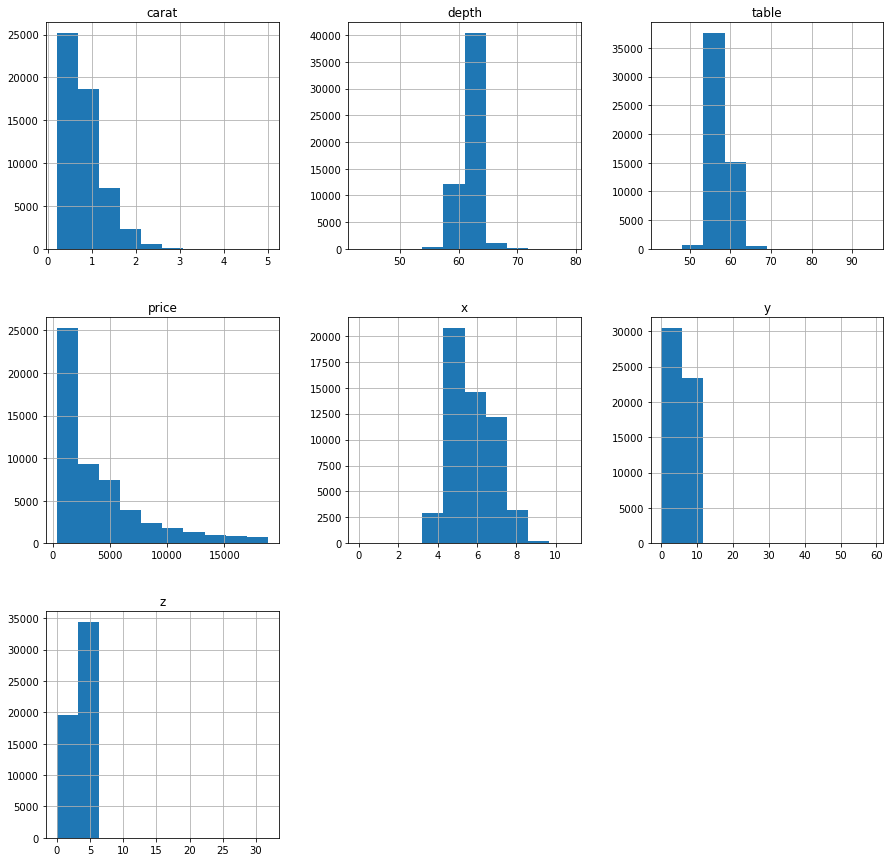

In [13]:
df.hist(figsize = (15,15))

<AxesSubplot:xlabel='depth', ylabel='Density'>

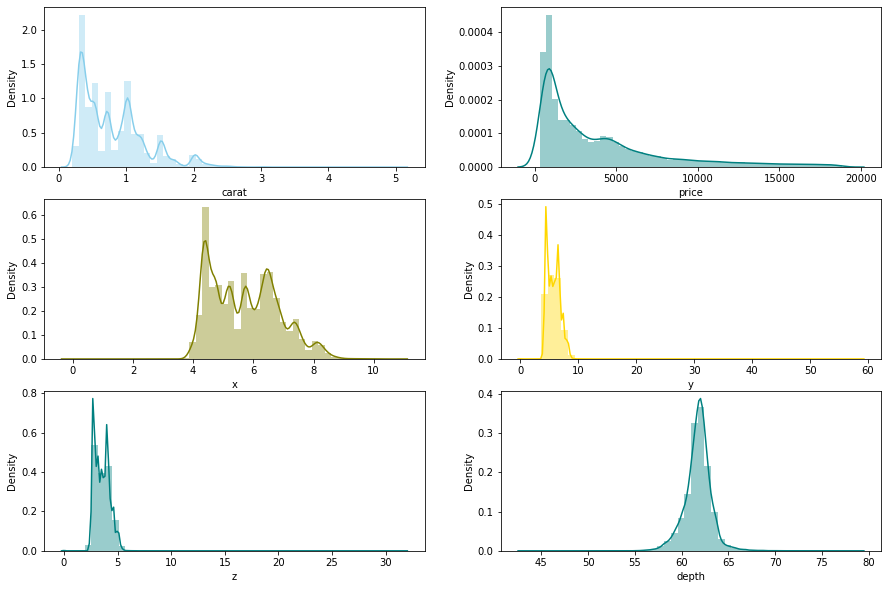

In [14]:
f, axes = plt.subplots(3,2, figsize=(15, 10))
sns.distplot(df['carat'], color="skyblue", ax=axes[0,0])
sns.distplot(df['price'], color="teal", ax=axes[0,1])
sns.distplot(df['x'], color="olive", ax=axes[1,0])
sns.distplot(df['y'], color="gold", ax=axes[1,1])
sns.distplot(df['z'], color="teal", ax=axes[2,0])
sns.distplot(df['depth'], color="teal", ax=axes[2,1])

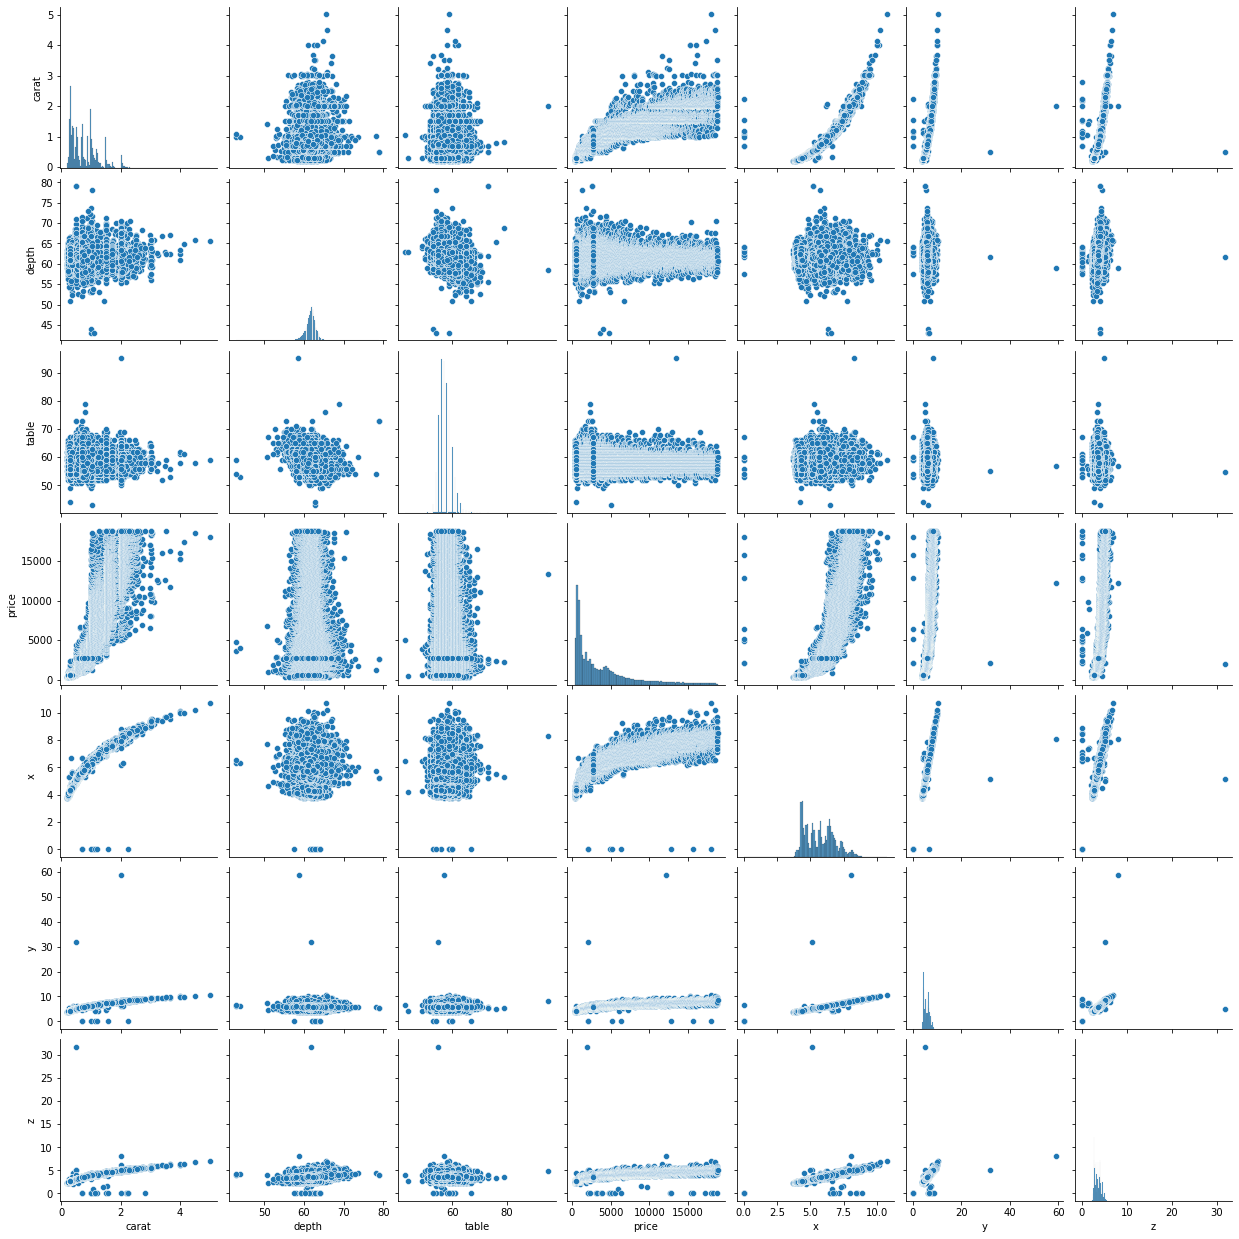

In [15]:
sns.pairplot(df)

<AxesSubplot:xlabel='cut', ylabel='count'>

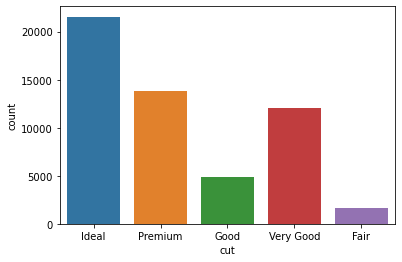

In [16]:
sns.countplot(df['cut'])

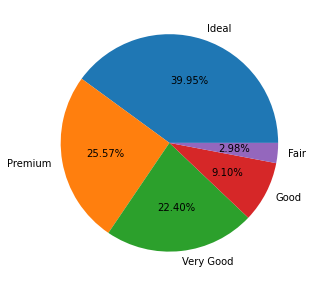

In [17]:
plt.figure(figsize=(12,5))
plt.pie(df['cut'].value_counts(),
        labels=df['cut'].value_counts().index,autopct='%1.2f%%');

<AxesSubplot:xlabel='color', ylabel='count'>

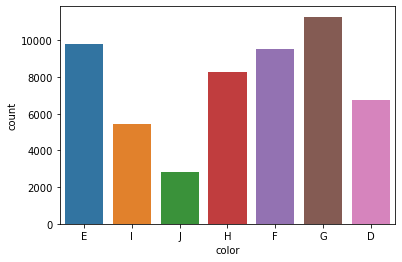

In [18]:
sns.countplot(df['color'])

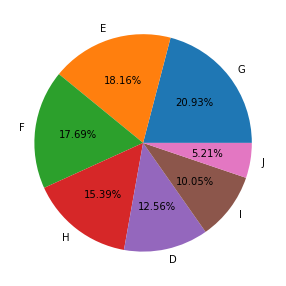

In [19]:
plt.figure(figsize=(12,5))
plt.pie(df['color'].value_counts(),
        labels=df['color'].value_counts().index,autopct='%1.2f%%');

<AxesSubplot:xlabel='clarity', ylabel='count'>

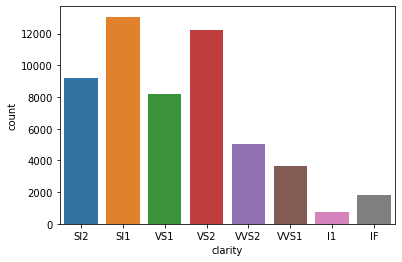

In [20]:
sns.countplot(df['clarity'])

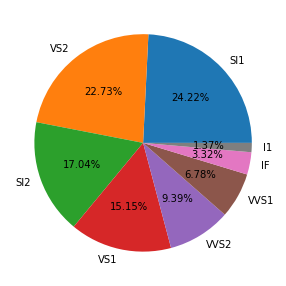

In [21]:
plt.figure(figsize=(12,5))
plt.pie(df['clarity'].value_counts(),
        labels=df['clarity'].value_counts().index,autopct='%1.2f%%');

### Observations:
1. Data is multimodal.
2. Skewness is observed in the dataset . carat and price are rightly skewed.
3. Depth, table,X,Y,Z features are normally distributed.
4. With the reference of above count plot we have maximum no. of ideal cut diamond and minimum no. of fair cut diamond.

### Bivariate Analysis

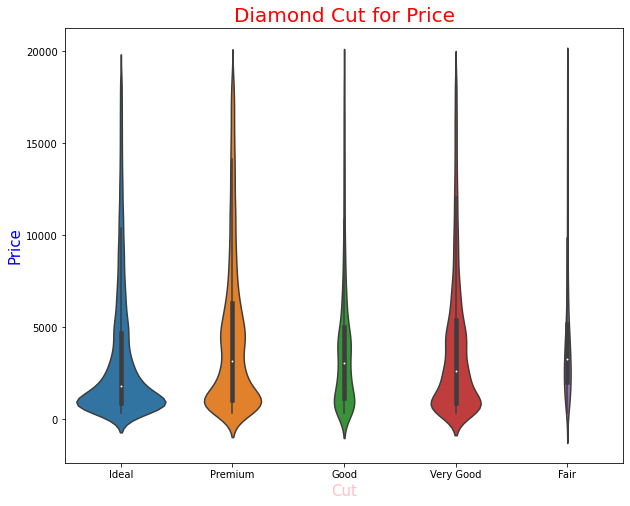

In [22]:
plt.figure(figsize=(10,8))
cols = ["Ideal","Premium","Good","Very Good","Fair"]
ax = sns.violinplot(x="cut",y="price", data=df, scale= "count")
ax.set_title("Diamond Cut for Price", color="red", fontsize = 20)
ax.set_ylabel("Price", color="blue", fontsize = 15)
ax.set_xlabel("Cut", color="pink", fontsize = 15)
plt.show()

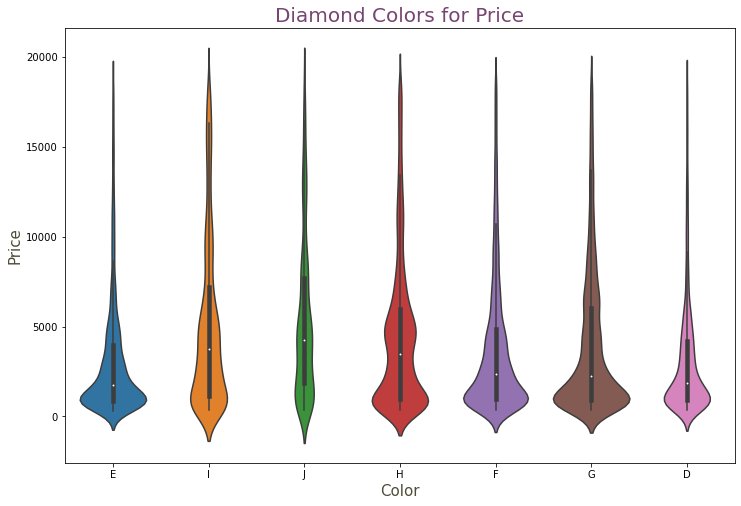

In [23]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="color",y="price", data=df,scale= "count")
ax.set_title("Diamond Colors for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Color", color="#4e4c39", fontsize = 15)
plt.show()

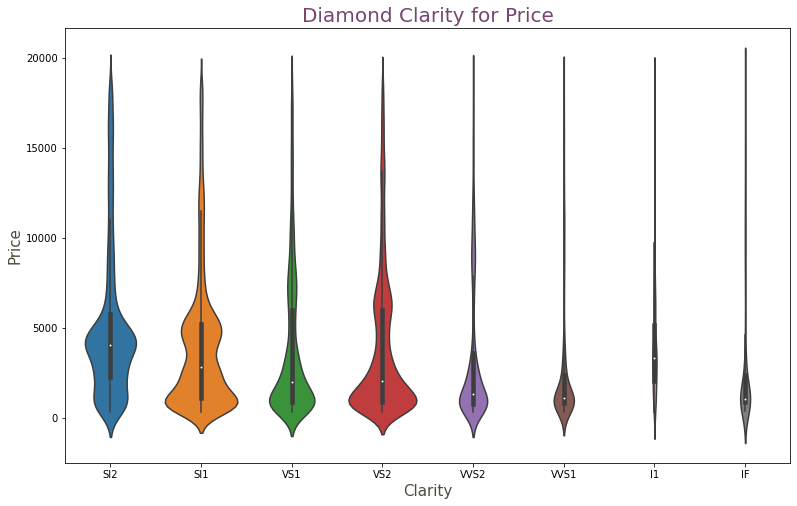

In [24]:
plt.figure(figsize=(13,8))
ax = sns.violinplot(x="clarity",y="price", data=df,scale= "count")
ax.set_title("Diamond Clarity for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Clarity", color="#4e4c39", fontsize = 15)
plt.show()

### Observation:
##### "Ideal" diamond cuts are the most in the number while the "Fair" is the least. More diamonds of all of such cuts for lower price category.
##### "J" color diamond which is worst are most rare however, "H" and "G" are more in number eventhough they're of inferior quality as well.
##### Diamonds of "IF" clarity which is best as well as "I1" which is worst are very rare and rest are mostly of in-between clarities.

## Multivariate Analysis

In [25]:
cor = df.corr()

In [26]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<AxesSubplot:>

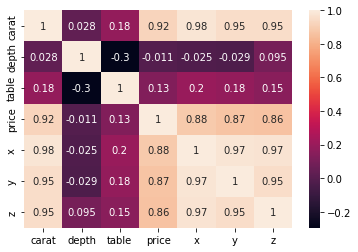

In [27]:
sns.heatmap(cor,annot = True)

<AxesSubplot:>

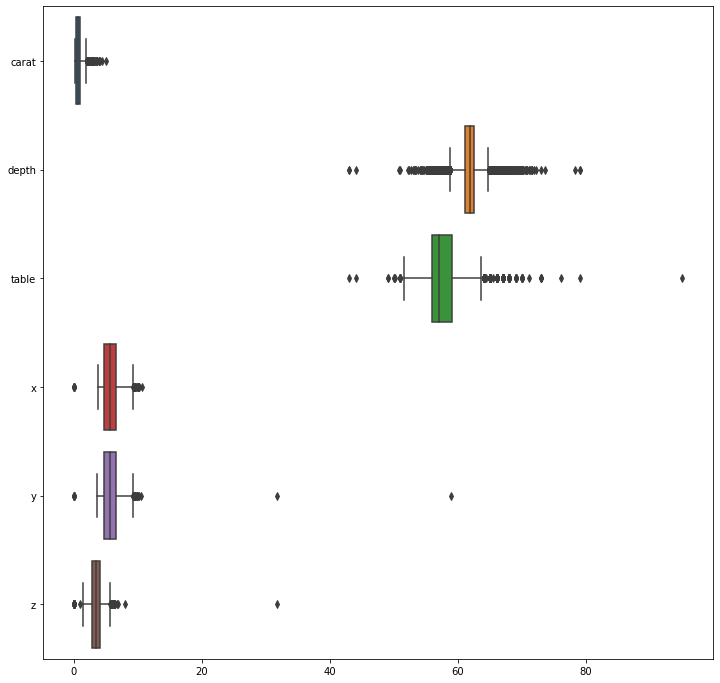

In [28]:
plt.figure(figsize = (12,12))
df1 = df.drop(['price'],axis =1)
sns.boxplot(data = df1,orient = 'h')

### Observations:
1. from the heatmap we can conclude that price (target column) has highly positive correlation with X,Y,Z and carat features.
2. from the box plot we can conclude that all the features have outliers

## Handle Missing Values

In [29]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Outliers Handling

In [30]:
# using InterQuartile Range we are handling outliers
for colname,colvals in df.iteritems():
    if df[colname].dtype!=object and colname!='price':
        Q1=df[colname].quantile(q=0.25)
        Q3=df[colname].quantile(q=0.75)
        IQR=Q3-Q1
        low=Q1-(1.5*IQR)
        up=Q3+(1.5*IQR)
        df.loc[(df[colname]<low) | (df[colname]>up) ,colname]=df[colname].median()
    else:
           continue

<AxesSubplot:>

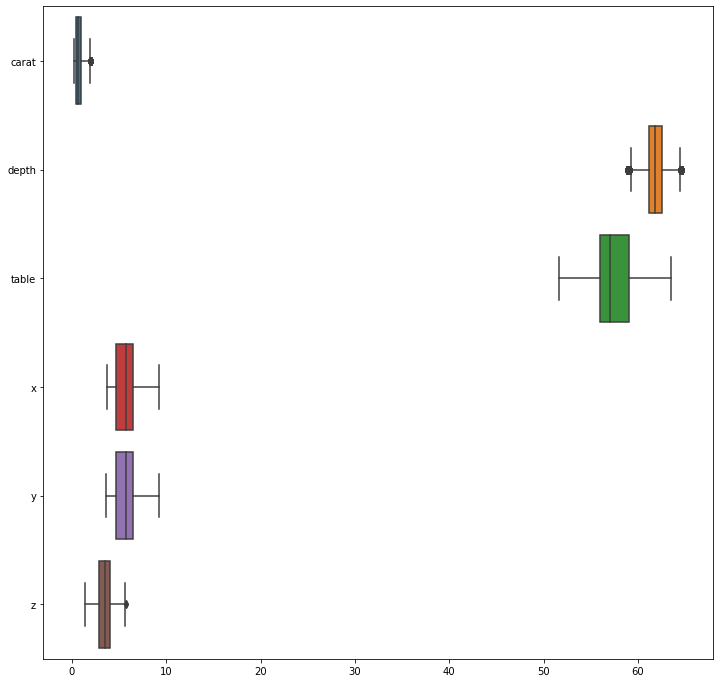

In [31]:
plt.figure(figsize = (12,12))
df1 = df.drop(['price'],axis =1)
sns.boxplot(data = df1,orient = 'h')

### Observations:
Depth and table shows max outliers, it may affect to our training dataset.

## Handle Categorical Data

In [32]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [33]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [34]:
df['cut'].replace(['Fair','Good','Very Good','Premium','Ideal'],[0,1,2,3,4],inplace=True)
df['clarity'].replace(['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'],[0,1,2,3,4,5,6,7],inplace=True)

In [35]:
diamond = pd.get_dummies(df,drop_first=True)
diamond.head()

,carat,cut,clarity,depth,table,price,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,4,1,61.5,55.0,326,3.95,3.98,2.43,1,0,0,0,0,0
1,0.21,3,2,59.8,61.0,326,3.89,3.84,2.31,1,0,0,0,0,0
2,0.23,1,4,61.8,57.0,327,4.05,4.07,2.31,1,0,0,0,0,0
3,0.29,3,3,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,1,0
4,0.31,1,1,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,1


In [36]:
diamond.corr()

,carat,cut,clarity,depth,table,price,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J
carat,1.000000,-0.134718,-0.310449,0.026161,0.171727,0.748972,0.879099,0.878437,0.879081,-0.119651,-0.033083,-0.007831,0.090244,0.110117,0.124214
cut,-0.134718,1.000000,0.189175,-0.227027,-0.379640,-0.053491,-0.125331,-0.125001,-0.150352,-0.004110,-0.007697,0.040155,-0.010380,-0.008836,-0.036153
clarity,-0.310449,0.189175,1.000000,-0.061349,-0.159927,-0.146800,-0.371504,-0.366337,-0.374652,-0.023205,0.023337,0.128835,-0.030397,-0.017654,-0.039078
depth,0.026161,-0.227027,-0.061349,1.000000,-0.228350,-0.008273,-0.019342,-0.021022,0.071482,-0.019209,-0.015006,-0.006722,0.016057,0.024002,0.026223
table,0.171727,-0.379640,-0.159927,-0.228350,1.000000,0.134089,0.194507,0.190046,0.160078,0.006529,-0.008677,-0.035327,0.013409,0.017576,0.036223
price,0.748972,-0.053491,-0.146800,-0.008273,0.134089,1.000000,0.884827,0.886766,0.879668,-0.101089,-0.024161,0.008556,0.059223,0.097125,0.081710
x,0.879099,-0.125331,-0.371504,-0.019342,0.194507,0.884827,1.000000,0.998232,0.988952,-0.134460,-0.047124,-0.024127,0.096144,0.145749,0.163470
y,0.878437,-0.125001,-0.366337,-0.021022,0.190046,0.886766,0.998232,1.000000,0.989057,-0.134247,-0.046696,-0.023881,0.094135,0.146322,0.164483
z,0.879081,-0.150352,-0.374652,0.071482,0.160078,0.879668,0.988952,0.989057,1.000000,-0.137187,-0.048484,-0.023122,0.097721,0.147142,0.166036
color_E,-0.119651,-0.004110,-0.023205,-0.019209,0.006529,-0.101089,-0.134460,-0.134247,-0.137187,1.000000,-0.218401,-0.242411,-0.200958,-0.157487,-0.110400


## Data is ready to learn from Algorithm

### Selecting Features And Target

In [37]:
X = diamond.drop('price',axis=1)
y= diamond['price']

In [38]:
### Standardization

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
X_scaled = scaler.fit_transform(X)

### Sampling Data Into Train And Test

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [41]:
print("Train size",X_train.size)
print("Train shape",X_train.shape)
print("Test size",X_test.size)
print("Test shape",X_test.shape)

Train size 604128
Train shape (43152, 14)
Test size 151032
Test shape (10788, 14)


# Simple Linear Regresssion

In [42]:
# Selecting Features And Target For Simple Linear Regression 
A = diamond[['carat']]
b= diamond['price']

In [43]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
A_scaled = scaler.fit_transform(A)

In [44]:
from sklearn.model_selection import train_test_split
A_train,A_test,b_train,b_test = train_test_split(A_scaled,b,test_size=0.2)

In [45]:
print("Train size",A_train.size)
print("Train shape",A_train.shape)
print("Test size",A_test.size)
print("Test shape",A_test.shape)

Train size 43152
Train shape (43152, 1)
Test size 10788
Test shape (10788, 1)


In [46]:
print("Test size",A_test.size)
print("Test shape",A_test.shape)
print(b_test.size)
print(b_test.shape)

Test size 10788
Test shape (10788, 1)
10788
(10788,)


In [47]:
# Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(A_train,b_train)
Reg_predict=reg.predict(A_test)


In [48]:
reg.score(A_test,b_test)

0.5718104035702212

In [49]:
reg.score(A_train,b_train)

0.5582443899384871

In [50]:
from sklearn import metrics
import math
R_score= metrics.r2_score(b_test,Reg_predict)
MSE = metrics.mean_squared_error(b_test,Reg_predict)
MAE = metrics.mean_absolute_error(b_test,Reg_predict)
RMSE = math.sqrt(metrics.mean_squared_error(b_test, Reg_predict))

In [51]:
random_re = pd.DataFrame({'Algorithm':['Linear Regression'],'R Square':[R_score],'Mean Squared Error':[MSE],'Mean Absolute Error':[MAE],'Root Mean Squared Error':[RMSE]},index={'1'})
results = random_re[['Algorithm','R Square','Mean Squared Error','Mean Absolute Error','Root Mean Squared Error']]
results

,Algorithm,R Square,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
1,Linear Regression,0.57181,6.807345e+06,1393.97625,2609.088938


# Multi Linear Regression Analysis

In [52]:
reg = LinearRegression()
reg.fit(X_train, y_train)
Reg_predict_1=reg.predict(X_test)

In [53]:
reg.score(X_train,y_train)

0.8431950924998391

In [54]:
reg.score(X_test,y_test)

0.8406158760303575

In [55]:
R_score_1= metrics.r2_score(y_test,Reg_predict_1)
MSE_1 = metrics.mean_squared_error(y_test,Reg_predict_1)
MAE_1 = metrics.mean_absolute_error(y_test,Reg_predict_1)
RMSE_1= math.sqrt(metrics.mean_squared_error(y_test,Reg_predict_1))

In [56]:
random_1 = pd.DataFrame({'Algorithm':['Multi Linear Regression'],'R Square':[R_score_1],'Mean Squared Error':[MSE_1],'Mean Absolute Error':[MAE_1],'Root Mean Squared Error':[RMSE_1]},index={'2'})
results_1 = pd.concat([results,random_1])
results_1 = results_1[['Algorithm','R Square','Mean Squared Error','Mean Absolute Error','Root Mean Squared Error']]
results_1

,Algorithm,R Square,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
1,Linear Regression,0.571810,6.807345e+06,1393.976250,2609.088938
2,Multi Linear Regression,0.840616,2.533701e+06,1213.639103,1591.760334


### Cross Validation

In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds_train = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores_train = cross_val_score(reg, X_train, y_train, scoring='r2', cv=folds_train)
print("Training r2_score: \t {0:.4f}".format(np.mean(scores_train)))
folds_test = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores_test = cross_val_score(reg, X_test, y_test, scoring='r2', cv=folds_test)
print("Testing r2_score: \t {0:.4f}".format(np.mean(scores_test)))

Training r2_score: 	 0.8428
Testing r2_score: 	 0.8408


# Using Lasso (L1 Regularized) Regression Model

In [58]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso()
lasso_reg.fit(X_train,y_train)

Lasso()

In [59]:
lasso_reg.score(X_train,y_train)

0.8431900321271023

In [60]:
lasso_reg.score(X_test,y_test)

0.8405922483102236

# Using Ridge (L2 Regularized) Regression Model

In [61]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [62]:
ridge_reg.score(X_train,y_train)

0.8431802468180274

In [63]:
ridge_reg.score(X_test,y_test)

0.8404764174745547

#### We see that Lasso and Ridge Regularizations prove to be beneficial when our Simple Linear Regression Model overfits. These results may not be that contrast but significant in most cases.Also that L1 & L2 Regularizations are used in Neural Networks too.

# Decision Tree Regression Analysis

In [64]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion = 'squared_error',random_state = 42,max_depth = 8)
dtr = dtr.fit(X_train,y_train)

In [65]:
y_predict = dtr.predict(X_test)

In [66]:
y_pred_tr = dtr.predict(X_train)
print("Decision tree training R2 Score",metrics.r2_score(y_train,y_pred_tr))

Decision tree training R2 Score 0.9632392908354745


In [67]:
dtr.score(X_train,y_train)

0.9632392908354745

In [68]:
R_score_1= metrics.r2_score(y_test,y_predict)
MSE_1 = metrics.mean_squared_error(y_test,y_predict)
MAE_1 = metrics.mean_absolute_error(y_test,y_predict)
RMSE_1= math.sqrt(metrics.mean_squared_error(y_test,y_predict))

In [69]:
random_2 = pd.DataFrame({'Algorithm':['Decission Tress Regressor'],'R Square':[R_score_1],'Mean Squared Error':[MSE_1],'Mean Absolute Error':[MAE_1],'Root Mean Squared Error':[RMSE_1]},index={'3'})
results_2 = pd.concat([results,random_1,random_2])
results_2 = results_2[['Algorithm','R Square','Mean Squared Error','Mean Absolute Error','Root Mean Squared Error']]
results_2

,Algorithm,R Square,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
1,Linear Regression,0.571810,6.807345e+06,1393.976250,2609.088938
2,Multi Linear Regression,0.840616,2.533701e+06,1213.639103,1591.760334
3,Decission Tress Regressor,0.961145,6.176668e+05,433.547554,785.917824


### Cross Validation

In [70]:
folds_train = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores_train = cross_val_score(dtr, X_train, y_train, scoring='r2', cv=folds_train)
print("Training r2_score: \t {0:.4f}".format(np.mean(scores_train)))
folds_test = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores_test = cross_val_score(dtr, X_test, y_test, scoring='r2', cv=folds_test)
print("Testing r2_score: \t {0:.4f}".format(np.mean(scores_test)))

Training r2_score: 	 0.9575
Testing r2_score: 	 0.9547


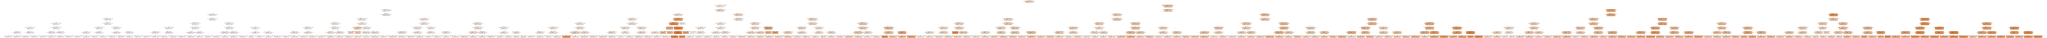

In [71]:
#Visualization of the decision graph :
from sklearn import tree
dtree = tree.DecisionTreeRegressor(criterion='squared_error',max_depth = 8, random_state=42)
dtree.fit(X_train, y_train)
import graphviz
from sklearn import tree
feature_names = X.columns

dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,feature_names=feature_names)
graph = graphviz.Source(dot_data)  
graph

# Random Forest Regressor Analysis

In [72]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 500,random_state = 42,max_depth = 10,n_jobs = -1)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=500, n_jobs=-1,
                      random_state=42)

In [73]:
y_pred_tr = model.predict(X_train)
print("Random forest Regressortraining R2 Score",metrics.r2_score(y_train,y_pred_tr))

Random forest Regressortraining R2 Score 0.9801625344578382


In [74]:
y_predict_3 = model.predict(X_test)

In [75]:
R_score_1= metrics.r2_score(y_test,y_predict_3)
MSE_1 = metrics.mean_squared_error(y_test,y_predict_3)
MAE_1 = metrics.mean_absolute_error(y_test,y_predict_3)
RMSE_1= math.sqrt(metrics.mean_squared_error(y_test,y_predict_3))

In [76]:
random_3 = pd.DataFrame({'Algorithm':['Random Forest Regressor'],'R Square':[R_score_1],'Mean Squared Error':[MSE_1],'Mean Absolute Error':[MAE_1],'Root Mean Squared Error':[RMSE_1]},index={'4'})
results_3 = pd.concat([results,random_1,random_2,random_3])
results_3 = results_3[['Algorithm','R Square','Mean Squared Error','Mean Absolute Error','Root Mean Squared Error']]
results_3

,Algorithm,R Square,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
1,Linear Regression,0.571810,6.807345e+06,1393.976250,2609.088938
2,Multi Linear Regression,0.840616,2.533701e+06,1213.639103,1591.760334
3,Decission Tress Regressor,0.961145,6.176668e+05,433.547554,785.917824
4,Random Forest Regressor,0.974855,3.997214e+05,336.308655,632.235261


### Cross Validation

In [77]:
folds_train = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores_train = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds_train)
print("Training r2_score: \t {0:.4f}".format(np.mean(scores_train)))
folds_test = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores_test = cross_val_score(model, X_test, y_test, scoring='r2', cv=folds_test)
print("Testing r2_score: \t {0:.4f}".format(np.mean(scores_test)))

Training r2_score: 	 0.9739
Testing r2_score: 	 0.9698


# K-Neighbors Regressor Analysis

In [78]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5,n_jobs = -1, leaf_size = 10)
neigh.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=10, n_jobs=-1)

In [79]:
neigh.score(X_train,y_train)

0.9754514174520182

In [80]:
y_predict_4 = neigh.predict(X_test)

In [81]:
from sklearn import metrics
import math

In [82]:
R_score_1= metrics.r2_score(y_test,y_predict_4)
MSE_1 = metrics.mean_squared_error(y_test,y_predict_4)
MAE_1 = metrics.mean_absolute_error(y_test,y_predict_4)
RMSE_1= math.sqrt(metrics.mean_squared_error(y_test,y_predict_4))

In [83]:
random_4 = pd.DataFrame({'Algorithm':['K-Neighbors Regressor'],'R Square':[R_score_1],'Mean Squared Error':[MSE_1],'Mean Absolute Error':[MAE_1],'Root Mean Squared Error':[RMSE_1]},index={'5'})
results_4 = pd.concat([results,random_1,random_2,random_3,random_4])
results_4 = results_4[['Algorithm','R Square','Mean Squared Error','Mean Absolute Error','Root Mean Squared Error']]
results_4

,Algorithm,R Square,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
1,Linear Regression,0.571810,6.807345e+06,1393.976250,2609.088938
2,Multi Linear Regression,0.840616,2.533701e+06,1213.639103,1591.760334
3,Decission Tress Regressor,0.961145,6.176668e+05,433.547554,785.917824
4,Random Forest Regressor,0.974855,3.997214e+05,336.308655,632.235261
5,K-Neighbors Regressor,0.960135,6.337240e+05,392.078050,796.067806


### Cross Validation

In [84]:
folds_train = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores_train = cross_val_score(neigh, X_train, y_train, scoring='r2', cv=folds_train)
print("Training r2_score: \t {0:.4f}".format(np.mean(scores_train)))
folds_test = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores_test = cross_val_score(neigh, X_test, y_test, scoring='r2', cv=folds_test)
print("Testing r2_score: \t {0:.4f}".format(np.mean(scores_test)))

Training r2_score: 	 0.9593
Testing r2_score: 	 0.9471


In [85]:
# pip install mlxtend 

# Bagging

In [86]:
from sklearn.ensemble import BaggingRegressor 

bag_reg = BaggingRegressor(base_estimator= dtr, n_estimators=500,    
                            max_samples=100, bootstrap=True, oob_score= True, n_jobs=-1) 
bag_reg.fit(X_train, y_train) 
y_train_pred = bag_reg.predict(X_train)
train_r2 = metrics.r2_score(y_train,y_train_pred)
print("Bagging training score:", train_r2)
y_test_pred = bag_reg.predict(X_test)
test_r2 = metrics.r2_score(y_test,y_test_pred)
print("Bagging testing score:", test_r2)

Bagging training score: 0.9144814278171132
Bagging testing score: 0.9136737138696971


In [87]:
R_score_1= metrics.r2_score(y_test,y_test_pred)
MSE_1 = metrics.mean_squared_error(y_test,y_test_pred)
MAE_1 = metrics.mean_absolute_error(y_test,y_test_pred)
RMSE_1= math.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

In [88]:
random_5 = pd.DataFrame({'Algorithm':['Bagging with Decision Tree'],'R Square':[R_score_1],'Mean Squared Error':[MSE_1],'Mean Absolute Error':[MAE_1],'Root Mean Squared Error':[RMSE_1]},index={'6'})
results_5 = pd.concat([results,random_1,random_2,random_3,random_4,random_5])
results_5 = results_5[['Algorithm','R Square','Mean Squared Error','Mean Absolute Error','Root Mean Squared Error']]
results_5

,Algorithm,R Square,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
1,Linear Regression,0.571810,6.807345e+06,1393.976250,2609.088938
2,Multi Linear Regression,0.840616,2.533701e+06,1213.639103,1591.760334
3,Decission Tress Regressor,0.961145,6.176668e+05,433.547554,785.917824
4,Random Forest Regressor,0.974855,3.997214e+05,336.308655,632.235261
5,K-Neighbors Regressor,0.960135,6.337240e+05,392.078050,796.067806
6,Bagging with Decision Tree,0.913674,1.372314e+06,630.085126,1171.457877


In [89]:
bag_reg.oob_score_

0.9140846310377302

# AdaBoost Regressor

In [90]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(base_estimator = dtr, random_state=42)

adaboost.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=8,
                                                       random_state=42),
                  random_state=42)

In [91]:
y_train_ada = adaboost.predict(X_train)
print("Adaboost Regressor training R2 Score",metrics.r2_score(y_train,y_train_ada))
y_ada_predict = adaboost.predict(X_test)

Adaboost Regressor training R2 Score 0.9779892407810369


In [92]:
R_score_1= metrics.r2_score(y_test,y_ada_predict)
MSE_1 = metrics.mean_squared_error(y_test,y_ada_predict)
MAE_1 = metrics.mean_absolute_error(y_test,y_ada_predict)
RMSE_1= math.sqrt(metrics.mean_squared_error(y_test,y_ada_predict))

In [93]:
random_6 = pd.DataFrame({'Algorithm':['ADA-Boost Regressor'],'R Square':[R_score_1],'Mean Squared Error':[MSE_1],'Mean Absolute Error':[MAE_1],'Root Mean Squared Error':[RMSE_1]},index={'7'})
results_6 = pd.concat([results,random_1,random_2,random_3,random_4,random_5,random_6])
results_6 = results_6[['Algorithm','R Square','Mean Squared Error','Mean Absolute Error','Root Mean Squared Error']]
results_6

,Algorithm,R Square,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
1,Linear Regression,0.571810,6.807345e+06,1393.976250,2609.088938
2,Multi Linear Regression,0.840616,2.533701e+06,1213.639103,1591.760334
3,Decission Tress Regressor,0.961145,6.176668e+05,433.547554,785.917824
4,Random Forest Regressor,0.974855,3.997214e+05,336.308655,632.235261
5,K-Neighbors Regressor,0.960135,6.337240e+05,392.078050,796.067806
6,Bagging with Decision Tree,0.913674,1.372314e+06,630.085126,1171.457877
7,ADA-Boost Regressor,0.971801,4.482718e+05,399.714089,669.531064


### Cross Validation

In [94]:
folds_train = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores_train = cross_val_score(adaboost, X_train, y_train, scoring='r2', cv=folds_train)
print("Training r2_score: \t {0:.4f}".format(np.mean(scores_train)))
folds_test = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores_test = cross_val_score(adaboost, X_test, y_test, scoring='r2', cv=folds_test)
print("Testing r2_score: \t {0:.4f}".format(np.mean(scores_test)))

Training r2_score: 	 0.9712
Testing r2_score: 	 0.9677


# Gradient Boosting Regressor Analysis


In [95]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(random_state=42)
gbrt.fit(X_train,y_train)

y_gbrt_predict_tr = gbrt.predict(X_train)
R_score_1= metrics.r2_score(y_train,y_gbrt_predict_tr)
print("Gradient Boosting Regressor:",R_score_1)

Gradient Boosting Regressor: 0.9688042705351302


In [96]:
y_gbrt_predict = gbrt.predict(X_test)
R_score_1= metrics.r2_score(y_test,y_gbrt_predict)
MSE_1 = metrics.mean_squared_error(y_test,y_gbrt_predict)
MAE_1 = metrics.mean_absolute_error(y_test,y_gbrt_predict)
RMSE_1= math.sqrt(metrics.mean_squared_error(y_test,y_gbrt_predict))
random_7 = pd.DataFrame({'Algorithm':['Gradient Boosting Regressor'],'R Square':[R_score_1],'Mean Squared Error':[MSE_1],'Mean Absolute Error':[MAE_1],'Root Mean Squared Error':[RMSE_1]},index={'8'})
results_7 = pd.concat([results,random_1,random_2,random_3,random_4,random_5,random_6,random_7])
results_7 = results_7[['Algorithm','R Square','Mean Squared Error','Mean Absolute Error','Root Mean Squared Error']]
results_7

,Algorithm,R Square,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
1,Linear Regression,0.571810,6.807345e+06,1393.976250,2609.088938
2,Multi Linear Regression,0.840616,2.533701e+06,1213.639103,1591.760334
3,Decission Tress Regressor,0.961145,6.176668e+05,433.547554,785.917824
4,Random Forest Regressor,0.974855,3.997214e+05,336.308655,632.235261
5,K-Neighbors Regressor,0.960135,6.337240e+05,392.078050,796.067806
6,Bagging with Decision Tree,0.913674,1.372314e+06,630.085126,1171.457877
7,ADA-Boost Regressor,0.971801,4.482718e+05,399.714089,669.531064
8,Gradient Boosting Regressor,0.966480,5.328628e+05,379.577995,729.974500


### Cross Validation

In [97]:
folds_train = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores_train = cross_val_score(gbrt, X_train, y_train, scoring='r2', cv=folds_train)
print("Training r2_score: \t {0:.4f}".format(np.mean(scores_train)))
folds_test = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores_test = cross_val_score(gbrt, X_test, y_test, scoring='r2', cv=folds_test)
print("Testing r2_score: \t {0:.4f}".format(np.mean(scores_test)))

Training r2_score: 	 0.9660
Testing r2_score: 	 0.9654


# Xtreme Gradient Boost Regression Analysis

In [98]:
from xgboost.sklearn import XGBRegressor

xgb_reg = XGBRegressor(random_state=42)

xgb_reg.fit(X_train,y_train)

y_xgbrt_predict_tr = xgb_reg.predict(X_train)
R_score_1= metrics.r2_score(y_train,y_xgbrt_predict_tr)
print("Xtreme Gradient Boosting Regressor Training Score:",R_score_1)


Xtreme Gradient Boosting Regressor Training Score: 0.9901719753611904


In [99]:
y_xgb_predict = xgb_reg.predict(X_test)
R_score_1= metrics.r2_score(y_test,y_xgb_predict)
MSE_1 = metrics.mean_squared_error(y_test,y_xgb_predict)
MAE_1 = metrics.mean_absolute_error(y_test,y_xgb_predict)
RMSE_1= math.sqrt(metrics.mean_squared_error(y_test,y_xgb_predict))
random_8 = pd.DataFrame({'Algorithm':['XGBoost Regressor'],'R Square':[R_score_1],'Mean Squared Error':[MSE_1],'Mean Absolute Error':[MAE_1],'Root Mean Squared Error':[RMSE_1]},index={'9'})
results_8 = pd.concat([results,random_1,random_2,random_3,random_4,random_5,random_6,random_7,random_8])
results_8 = results_8[['Algorithm','R Square','Mean Squared Error','Mean Absolute Error','Root Mean Squared Error']]
results_8

,Algorithm,R Square,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
1,Linear Regression,0.571810,6.807345e+06,1393.976250,2609.088938
2,Multi Linear Regression,0.840616,2.533701e+06,1213.639103,1591.760334
3,Decission Tress Regressor,0.961145,6.176668e+05,433.547554,785.917824
4,Random Forest Regressor,0.974855,3.997214e+05,336.308655,632.235261
5,K-Neighbors Regressor,0.960135,6.337240e+05,392.078050,796.067806
6,Bagging with Decision Tree,0.913674,1.372314e+06,630.085126,1171.457877
7,ADA-Boost Regressor,0.971801,4.482718e+05,399.714089,669.531064
8,Gradient Boosting Regressor,0.966480,5.328628e+05,379.577995,729.974500
9,XGBoost Regressor,0.978633,3.396638e+05,285.693648,582.806827


### Cross Validation

In [100]:
folds_train = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores_train = cross_val_score(xgb_reg, X_train, y_train, scoring='r2', cv=folds_train)
print("Training r2_score: \t {0:.4f}".format(np.mean(scores_train)))
folds_test = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores_test = cross_val_score(xgb_reg, X_test, y_test, scoring='r2', cv=folds_test)
print("Testing r2_score: \t {0:.4f}".format(np.mean(scores_test)))

Training r2_score: 	 0.9778
Testing r2_score: 	 0.9701


# Support Vector Regression

In [101]:
from sklearn import svm
model = svm.SVR(kernel = 'linear')
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
print("SVR Training Score:",metrics.r2_score(y_train,y_train_pred))
y_test_pred = model.predict(X_test)

R_score_1= metrics.r2_score(y_test,y_test_pred)
MSE_1 = metrics.mean_squared_error(y_test,y_test_pred)
MAE_1 = metrics.mean_absolute_error(y_test,y_test_pred)
RMSE_1= math.sqrt(metrics.mean_squared_error(y_test,y_test_pred))

SVR Training Score: 0.7324991815695394


In [102]:
random_9 = pd.DataFrame({'Algorithm':['Support Vector Regressor'],'R Square':[R_score_1],'Mean Squared Error':[MSE_1],'Mean Absolute Error':[MAE_1],'Root Mean Squared Error':[RMSE_1]},index={'11'})
results_9 = pd.concat([results,random_1,random_2,random_3,random_4,random_5,random_6,random_7,random_8,random_9])
results_9 = results_9[['Algorithm','R Square','Mean Squared Error','Mean Absolute Error','Root Mean Squared Error']]
results_9

,Algorithm,R Square,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error
1,Linear Regression,0.571810,6.807345e+06,1393.976250,2609.088938
2,Multi Linear Regression,0.840616,2.533701e+06,1213.639103,1591.760334
3,Decission Tress Regressor,0.961145,6.176668e+05,433.547554,785.917824
4,Random Forest Regressor,0.974855,3.997214e+05,336.308655,632.235261
5,K-Neighbors Regressor,0.960135,6.337240e+05,392.078050,796.067806
6,Bagging with Decision Tree,0.913674,1.372314e+06,630.085126,1171.457877
7,ADA-Boost Regressor,0.971801,4.482718e+05,399.714089,669.531064
8,Gradient Boosting Regressor,0.966480,5.328628e+05,379.577995,729.974500
9,XGBoost Regressor,0.978633,3.396638e+05,285.693648,582.806827
11,Support Vector Regressor,0.733291,4.239820e+06,1100.270594,2059.082227


### Cross Validation

In [104]:
folds_train = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores_train = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds_train)
print("Training r2_score: \t {0:.4f}".format(np.mean(scores_train)))
folds_test = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores_test = cross_val_score(model, X_test, y_test, scoring='r2', cv=folds_test)
print("Testing r2_score: \t {0:.4f}".format(np.mean(scores_test)))

Training r2_score: 	 0.7307
Testing r2_score: 	 0.6990


# Votting Regressor

In [105]:
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor(criterion = "squared_error", random_state = 42)
random_forest_reg = RandomForestRegressor(random_state = 42)
kneighbour_reg = KNeighborsRegressor(n_neighbors=5)
adaboost_reg = AdaBoostRegressor(random_state=42)
gbr_reg = GradientBoostingRegressor(random_state=42)
xgb_reg = XGBRegressor(random_state=42)
svr = svm.SVR(kernel = 'linear')
from sklearn.ensemble import VotingRegressor
voting_reg = VotingRegressor(estimators=[('LR', linear_reg), ('DTR',decision_tree_reg),('RFR',random_forest_reg),
                                         ('KNR',kneighbour_reg),('ABR',adaboost_reg),('GBR',gbr_reg ),
                                         ('XGBR',xgb_reg),('SVR',svr)])

voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('DTR', DecisionTreeRegressor(random_state=42)),
                            ('RFR', RandomForestRegressor(random_state=42)),
                            ('KNR', KNeighborsRegressor()),
                            ('ABR', AdaBoostRegressor(random_state=42)),
                            ('GBR', GradientBoostingRegressor(random_state=42)),
                            ('XGBR',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_byl...
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
     

In [106]:
for (name, prd) in ('LR', linear_reg),('DTR',decision_tree_reg),('RFR',random_forest_reg),('KNR',kneighbour_reg),('ABR',adaboost_reg),('GBR',gbr_reg ),('XGBR',xgb_reg),('SVR',svr),('Voting Regressor',voting_reg):
    prd.fit(X_train, y_train)

In [107]:
for reg in (linear_reg, decision_tree_reg,random_forest_reg,kneighbour_reg,adaboost_reg,gbr_reg,xgb_reg ,svr,voting_reg):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(reg.__class__.__name__, metrics.r2_score(y_test,y_pred))

LinearRegression 0.8406158760303575
DecisionTreeRegressor 0.9600382100008366
RandomForestRegressor 0.9790241876368622
KNeighborsRegressor 0.9601361811880748
AdaBoostRegressor 0.8713459505434524
GradientBoostingRegressor 0.966479917275997
XGBRegressor 0.9786332255682574
SVR 0.7332913608486862
VotingRegressor 0.9619534845906808


# Predicting Values From Model Using Same Dataset

In [108]:
xgb_reg1 = pd.DataFrame({'Actual value': y_test, 'Predicted value': xgb_reg.predict(X_test),  'Error': (y_test - (xgb_reg.predict(X_test)))})
xgb_reg1.head(10)

,Actual value,Predicted value,Error
1388,559,517.192261,41.807739
50052,2201,2508.858398,-307.858398
41645,1238,1228.968994,9.031006
42377,1304,1208.580444,95.419556
17244,6901,9673.914062,-2772.914062
1608,3011,3419.273926,-408.273926
46398,1765,1819.578491,-54.578491
45493,1679,1819.775635,-140.775635
49385,2102,2193.609863,-91.609863
10460,4789,5812.816895,-1023.816895


In [109]:
import numpy as np
l=[(0.21,0,1,59.8,61.0,3.89,3.84,2.31,0,0,1,0,0,0)]
i=np.array(l)
y_pred = xgb_reg.predict(i)
print('predictions for new Data :',y_pred)

predictions for new Data : [19138.773]
